# Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic acid']
df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

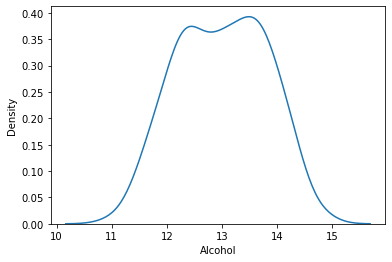

In [3]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

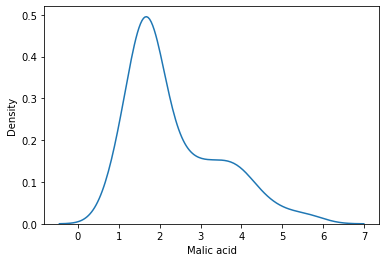

In [4]:
sns.kdeplot(df['Malic acid'])

C:\Users\User20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

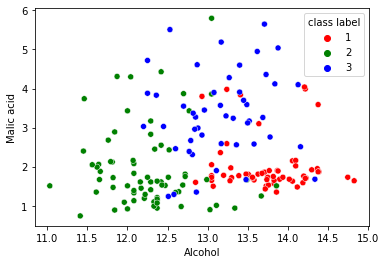

In [5]:
color_dic={1:'red',2:'green',3:"blue"}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['class label'],palette=color_dic)

In [6]:
x=df.drop('class label',axis=1)
y=df['class label']


In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler # normalization
scaler = MinMaxScaler()
#from sklearn.preprocessing import MinMaxScaler #Normalization
#scaler = MinMaxScaler()
##scaler.fit_transform(X_train)

In [10]:
scaler.fit(x_train)

MinMaxScaler()

In [11]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
x_test_scaled

array([[ 0.88978495,  0.17099567],
       [ 0.63709677,  0.8030303 ],
       [ 0.53763441,  0.0021645 ],
       [ 0.68548387,  0.36580087],
       [ 0.60752688,  0.23376623],
       [ 0.6344086 ,  0.19047619],
       [ 0.39784946,  0.07575758],
       [ 0.32795699,  0.18181818],
       [ 0.82526882,  0.27489177],
       [ 0.87903226,  0.22294372],
       [ 0.42204301,  0.0974026 ],
       [ 0.28225806,  0.10822511],
       [ 0.30376344,  0.15584416],
       [ 0.75268817,  0.16450216],
       [ 0.28225806,  0.2034632 ],
       [ 0.10215054, -0.03246753],
       [ 0.16397849,  0.25324675],
       [ 0.48924731,  0.15367965],
       [ 0.40053763,  0.33333333],
       [ 0.75      ,  0.18614719],
       [ 0.54301075,  0.19047619],
       [ 0.66397849,  0.1991342 ],
       [ 0.51075269,  0.41558442],
       [ 0.27150538,  0.73809524],
       [ 0.82526882,  0.24458874],
       [ 0.30645161,  0.12121212],
       [ 0.54301075,  0.64285714],
       [ 0.57526882,  0.93073593],
       [ 0.89784946,

In [13]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.530134,0.327259
std,0.217581,0.237770
min,0.000000,0.000000
25%,0.360215,0.145022
50%,0.543011,0.218615
75%,0.713038,0.516775
max,1.000000,1.000000


In [15]:
x_test_scaled.describe()

,Alcohol,Malic acid
count,54.000000,54.000000
mean,0.528823,0.280463
std,0.221771,0.250023
min,0.102151,-0.032468
25%,0.338710,0.155844
50%,0.543011,0.190476
75%,0.681452,0.318723
max,1.021505,1.062771


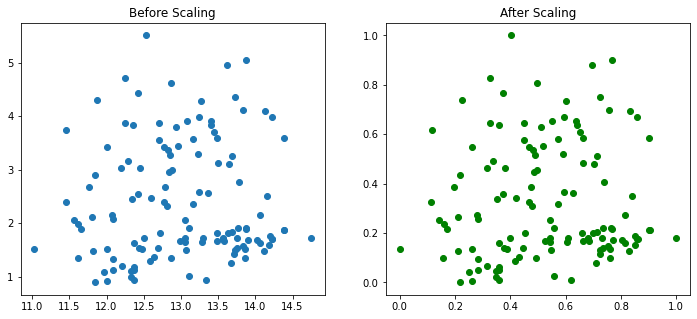

In [16]:
import matplotlib.pyplot as plt 

fig, (ax1, ax2)=plt.subplots(ncols=2,figsize=(12,5)) 

ax1.scatter(x_train['Alcohol'],x_train['Malic acid']) 
ax1.set_title('Before Scaling') 

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'], color='green') 
ax2.set_title('After Scaling') 
plt.show() 


# Effects of Outliers in normalization

In [17]:
df.describe()

,class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [18]:
df2 = pd.DataFrame({
    "Alcohol" : [30, 35, 40],
    "Malic acid" : [15, 20,25],
    "class label": [1,2,3]
})
df2

,Alcohol,Malic acid,class label
0,30,15,1
1,35,20,2
2,40,25,3


In [19]:
df3 = df.append(df2)
df3.describe()

C:\Users\User20\AppData\Local\Temp\ipykernel_16896\4152036039.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2)


,class label,Alcohol,Malic acid
count,181.000000,181.000000,181.000000
mean,1.939227,13.365249,2.629116
std,0.775785,2.976302,2.572718
min,1.000000,11.030000,0.740000
25%,1.000000,12.370000,1.610000
50%,2.000000,13.050000,1.870000
75%,3.000000,13.710000,3.170000
max,3.000000,40.000000,25.000000


C:\Users\User20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

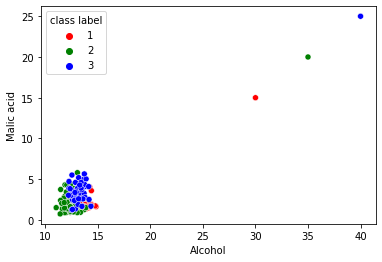

In [20]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df3['Alcohol'],df3['Malic acid'],hue=df3['class label'],palette=color_dict)

In [21]:
X_train_o, X_test_o ,y_train_o,y_test_o = train_test_split(df3.drop('class label',axis=1),df3['class label'],
                                                  test_size=0.3,
                                                  random_state=0)

In [22]:
X_train_scaled_o = pd.DataFrame(scaler.fit_transform(X_train_o),columns=x_train.columns)
X_test_scaled_o = pd.DataFrame(scaler.fit_transform(X_test_o),columns=x_test.columns)

C:\Users\User20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

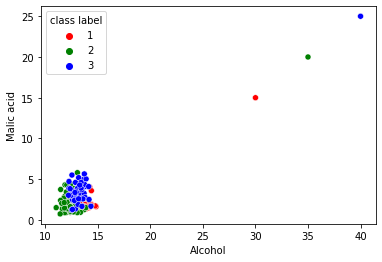

In [23]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df3['Alcohol'],df3['Malic acid'],hue=df3['class label'],palette=color_dict)

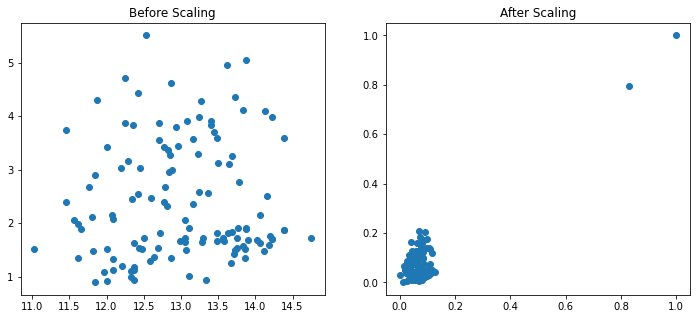

In [24]:
from matplotlib import pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled_o['Alcohol'],X_train_scaled_o['Malic acid'])
ax2.set_title('After Scaling')
plt.show()